<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a3_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number: 38

# Student 1: Adil Jahouh

# Student 2: Anvitha Thirthapura

# Student 3: Srinidhi Ilango

# Downloading Data and Preliminaries

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [2]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_pickle(zipfile, fn):
    return pickle.load(io.BytesIO(zipfile[fn]))

In [3]:
data = load_zip('https://surfdrive.surf.nl/files/index.php/s/cwqGaS22KXgnXtg/download')

    
"""
simulation_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_train = load_pickle(data, 'data/train/simulation.pickle')  # 3.1 + 3.2
simulation_valid = load_pickle(data, 'data/valid/simulation.pickle')  # 3.1 + 3.2
simulation_test = load_pickle(data, 'data/test/simulation.pickle')  # 3.1 + 3.2

"""
charges_{train, valid, test} is stored as a list of simulation-charges. 
These charges are stored as numpy arrays of size (3,): One value for each charge.
"""
charges_train = load_pickle(data, 'data/train/charges.pickle')  # 3.1
charges_valid = load_pickle(data, 'data/valid/charges.pickle')  # 3.1
charges_test = load_pickle(data, 'data/test/charges.pickle')  # 3.1

"""
simulation_continued_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_continued_train = load_pickle(data, 'data/train/simulation_continued.pickle')  # 3.2
simulation_continued_valid = load_pickle(data, 'data/valid/simulation_continued.pickle')  # 3.2
simulation_continued_test = load_pickle(data, 'data/test/simulation_continued.pickle')  # 3.2

"""
Note that the indices are shared throughout the different lists, e.g., for the 4th training simulation:
simulation_train[3] contains its initial simulation
charges_train[3] contains the charges associated with the simulation
simulation_continued_train[3] contains the continuation of the simulation 
                --> simulation_continued_train[3][0] is the state after simulation_train[3][-1]
"""
pass

In [4]:
print('Overview of no. datapoints:\n')

print('Task 3.1:')
print(f'{len(simulation_train)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(charges_train)} train, {len(charges_valid)} validation, {len(charges_test)} test charge pairs')
print()

print('Task 3.2:')
print('Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations')
print('We cut simulation_train down to the first 150 samples in simulation_train_task32')
simulation_train_task32 = simulation_train[:150]
print(f'{len(simulation_train_task32)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(simulation_continued_train)} train, {len(simulation_continued_valid)} validation, {len(simulation_continued_test)} test continuations')

print(f"""
For task 3.1, use:
{chr(10).join(["simulation_{} + charges_{}".format(t, t) for t in ["train", "valid", "test"]])}

For task 3.2, use:
{chr(10).join(["simulation_{} + simulation_continued_{}".format(*((t[0], t[1]) if isinstance(t, tuple) else (t, t))) for t in [("train_task32", "train"), "valid", "test"]])}
""")


Overview of no. datapoints:

Task 3.1:
800 train, 100 validation, 100 test simulations
800 train, 100 validation, 100 test charge pairs

Task 3.2:
Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations
We cut simulation_train down to the first 150 samples in simulation_train_task32
150 train, 100 validation, 100 test simulations
150 train, 100 validation, 100 test continuations

For task 3.1, use:
simulation_train + charges_train
simulation_valid + charges_valid
simulation_test + charges_test

For task 3.2, use:
simulation_train_task32 + simulation_continued_train
simulation_valid + simulation_continued_valid
simulation_test + simulation_continued_test



In [5]:
print('Print some shapes:\n')
for i in range(3):
    print('simulation_train[{}].shape:'.format(i), simulation_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('charges_train[{}].shape:'.format(i), charges_train[i].shape, '-> charges for the simulation')
    print('simulation_continued_train[{}].shape:'.format(i), simulation_continued_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('----\n')

Print some shapes:

simulation_train[0].shape: (103, 2) -> (t, 2), (x, y) at every t)
charges_train[0].shape: (3,) -> charges for the simulation
simulation_continued_train[0].shape: (54, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[1].shape: (97, 2) -> (t, 2), (x, y) at every t)
charges_train[1].shape: (3,) -> charges for the simulation
simulation_continued_train[1].shape: (45, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[2].shape: (99, 2) -> (t, 2), (x, y) at every t)
charges_train[2].shape: (3,) -> charges for the simulation
simulation_continued_train[2].shape: (47, 2) -> (t, 2), (x, y) at every t)
----



In [64]:
def plot_example(x, x_gt=None, y=None, y_gt=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    plt.plot(x[:, 0], x[:, 1], color=cmap(0))
    plt.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(5, 5)
    for charge in charge_locations:
        plt.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
        plt.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)

Charges are [-0.8843922  -0.82762483 -0.36014056]


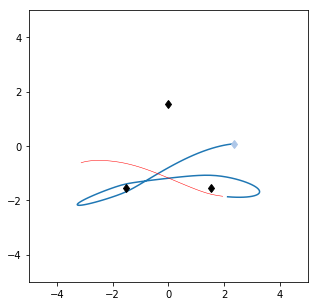

In [65]:
test_idx = np.random.randint(150)
plot_example(simulation_train[test_idx], simulation_continued_train[test_idx])
print(f'Charges are {charges_train[test_idx]}')

In [8]:
# saving and loading checkpoint mechanisms 
# modules adapted from https://github.com/ttchengab/One_Shot_Pytorch/blob/master/network.ipynb

def save_checkpoint(save_path, model, optimizer, val_loss):
  """
  Utility function for saving the model 

  Input
    --save_path: path to save the model
    --model: model to be saved
    --optimizer: optimizer to be saved
    --val_loss: lowest validation loss so far

  Output
    Saved model as pt file
  """
  if save_path==None:
      return
  save_path = save_path 
  state_dict = {'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': val_loss}

  torch.save(state_dict, save_path)
  print(f'Model saved to ==> {save_path}')


def load_checkpoint(model, optimizer):
  """
  Utility function to load a saved model
  Input
    --model: model object to load the weights into
    --optimizer: optimizer object
    
  Output:
    Validation loss
  """
  save_path = f'SiameseNetwork.pt'
  state_dict = torch.load(save_path)
  model.load_state_dict(state_dict['model_state_dict'])
  optimizer.load_state_dict(state_dict['optimizer_state_dict'])
  val_loss = state_dict['val_loss']
  print(f'Model loaded from <== {save_path}')
  
  return val_loss

# Task 3.1

## Data Handling and Preprocessing

Here, we deliberated over one of the following two options as the simulations have different lengths:
1. zero padding to match the simulation lenghts
2. without zero padding, pass one simuation at a time into the network and aggregate the outputs for backprop [ref1](https://discuss.pytorch.org/t/dataloader-for-various-length-of-data/6418/12#:~:text=2%20MONTHS%20LATER-,GalAvineri,-cdjhz), [ref2](https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch)

We now try the second option <br>
-- the model should be invariant to rotation, not sure about the implementation
[REF](https://discuss.pytorch.org/t/dataloader-for-various-length-of-data/6418/13)

In [9]:
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

def collate_batch(batch):
    '''
    Args:
        batch: batch sizes list of tuples (features, target)
    
    Returns:
        packed input simulation and corresponding targets
    
    '''
    data = [torch.from_numpy(item[0]).float() for item in batch]
    lengths = [d.size(0) for d in data]

    padded_data = pad_sequence(data, batch_first=True, padding_value=0)
    packed_data = pack_padded_sequence(padded_data, lengths, batch_first=True, enforce_sorted=False)
    
    targets = np.array([item[1] for item in batch])

    return packed_data.to(device), torch.tensor(targets).float().to(device)
    

c:\Users\Adil\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [10]:
# defining a DataLoaders for training, validation and testing
 
batch_len = 8

train_loader = DataLoader(tuple(zip(simulation_train, charges_train)), batch_size = batch_len, 
                        collate_fn = collate_batch)#,pin_memory=True)

val_loader = DataLoader(tuple(zip(simulation_valid, charges_valid)), batch_size = batch_len, 
                        collate_fn = collate_batch)#,pin_memory=True)

test_loader = DataLoader(tuple(zip(simulation_test, charges_test)),batch_size=1,
                        collate_fn = collate_batch)#,pin_memory=True)

## Model Implementation

[ref1](https://stackoverflow.com/questions/44643137/how-do-you-use-pytorch-packedsequence-in-code)
[ref2](https://www.crosstab.io/articles/time-series-pytorch-lstm)

In [11]:
from torch import nn

class RegressionLSTM(nn.Module):
    """
    LSTM model to find the charge of three particles
    """
    def __init__(self, inp_size=2, hidden_size=110, n_layers=1, batch_size=8, dropout=0.5):
        super(RegressionLSTM, self).__init__()
        
        self.inp_size = inp_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.batch_size = batch_size

        self.drop = nn.Dropout(p= dropout)        
        self.rnn = nn.LSTM(
            input_size = self.inp_size,
            hidden_size = self.hidden_size,
            num_layers = self.n_layers,
            batch_first = True
        )

        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(in_features=self.hidden_size, out_features=3)

    
    def forward(self, x):
        _,(hn,_) = self.rnn(x)#,(h0,c0))
        last_hidden_layer = hn[0]
        last_hidden_layer = self.drop(last_hidden_layer)
        h = self.fc1(last_hidden_layer)
        h  = self.fc2(h)
        # h = nn.Tanh()(h)
        output = nn.Tanh()(h)

        return output

## Model Training

In [12]:
# trainng and validation for every epoch

def train(model, train_loader, val_loader, num_epochs, loss_fn, save_name):

    best_val_loss = float("Inf") 
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for X, y in tqdm(train_loader):
            output = model(X)
            loss = loss_fn(output, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss/ len(train_loader)
        train_losses.append(avg_train_loss)


        val_running_loss = 0.0
        
        with torch.no_grad():
            model.eval()
            for X,y in val_loader:
                output = model(X)
                loss = loss_fn(output, y)
                val_running_loss += loss.item()

            avg_val_loss = val_running_loss/ len(val_loader)
            val_losses.append(avg_val_loss)

        print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}'
                .format(epoch+1, num_epochs, avg_train_loss, avg_val_loss))

        if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                save_checkpoint(save_name, model, optimizer, best_val_loss)
    
    print('Finished Training!!')
    return train_losses, val_losses


In [13]:
from tqdm import tqdm 

lr = 1e-5
hidden_units = 16

model = RegressionLSTM(batch_size=batch_len)
model.to(device)
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = lr)
num_epochs = 30

save_path = 'test_run1.pt'
train_losses, val_losses = train(model, train_loader, val_loader, 
                                num_epochs, loss_fn, save_path)

100%|██████████| 100/100 [00:01<00:00, 61.01it/s]


Epoch [1/30], train_loss: 0.3509, val_loss: 0.3642
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.11it/s]


Epoch [2/30], train_loss: 0.3301, val_loss: 0.3429
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 102.86it/s]


Epoch [3/30], train_loss: 0.3107, val_loss: 0.3221
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 101.71it/s]


Epoch [4/30], train_loss: 0.2904, val_loss: 0.3010
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.99it/s]


Epoch [5/30], train_loss: 0.2692, val_loss: 0.2790
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 99.58it/s]


Epoch [6/30], train_loss: 0.2474, val_loss: 0.2559
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.50it/s]


Epoch [7/30], train_loss: 0.2249, val_loss: 0.2311
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 96.88it/s]


Epoch [8/30], train_loss: 0.1995, val_loss: 0.2037
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 97.92it/s]


Epoch [9/30], train_loss: 0.1732, val_loss: 0.1738
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 96.13it/s]


Epoch [10/30], train_loss: 0.1433, val_loss: 0.1414
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 101.60it/s]


Epoch [11/30], train_loss: 0.1152, val_loss: 0.1108
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 101.50it/s]


Epoch [12/30], train_loss: 0.0907, val_loss: 0.0933
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 101.29it/s]


Epoch [13/30], train_loss: 0.0841, val_loss: 0.0893
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 101.19it/s]


Epoch [14/30], train_loss: 0.0815, val_loss: 0.0880
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 102.33it/s]


Epoch [15/30], train_loss: 0.0815, val_loss: 0.0877
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 100.68it/s]


Epoch [16/30], train_loss: 0.0813, val_loss: 0.0873
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 99.28it/s]


Epoch [17/30], train_loss: 0.0803, val_loss: 0.0872
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 99.58it/s]


Epoch [18/30], train_loss: 0.0810, val_loss: 0.0871
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.89it/s]


Epoch [19/30], train_loss: 0.0805, val_loss: 0.0871
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 97.16it/s]


Epoch [20/30], train_loss: 0.0818, val_loss: 0.0869
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.02it/s]


Epoch [21/30], train_loss: 0.0818, val_loss: 0.0869
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 100.28it/s]


Epoch [22/30], train_loss: 0.0802, val_loss: 0.0869
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:00<00:00, 100.78it/s]


Epoch [23/30], train_loss: 0.0811, val_loss: 0.0869
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.69it/s]


Epoch [24/30], train_loss: 0.0800, val_loss: 0.0867
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.50it/s]


Epoch [25/30], train_loss: 0.0798, val_loss: 0.0867
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 97.83it/s]


Epoch [26/30], train_loss: 0.0805, val_loss: 0.0866
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 97.54it/s]


Epoch [27/30], train_loss: 0.0803, val_loss: 0.0865
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 98.02it/s]


Epoch [28/30], train_loss: 0.0810, val_loss: 0.0864
Model saved to ==> test_run1.pt


100%|██████████| 100/100 [00:01<00:00, 97.87it/s]


Epoch [29/30], train_loss: 0.0807, val_loss: 0.0865


100%|██████████| 100/100 [00:01<00:00, 98.03it/s]


Epoch [30/30], train_loss: 0.0794, val_loss: 0.0864
Model saved to ==> test_run1.pt
Finished Training!!


In [14]:
val_losses[1] 

0.34293176806890047

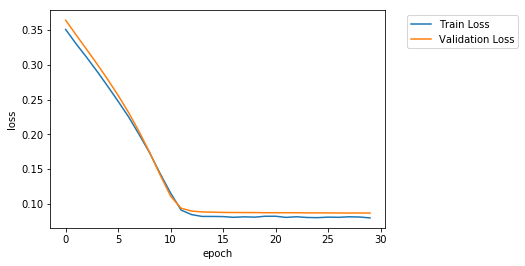

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label="Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Evaluation

In [17]:
lr = 1e-5
hidden_units = 16

model = RegressionLSTM(batch_size=batch_len)
model.to(device)
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = lr)
num_epochs = 30

def test(model):
    with torch.no_grad():
        model.eval()
        outputs = []
        labels = []
        for X,y in test_loader:
            output = model(X)
            outputs.append(output)
            labels.append(y)
        return outputs, labels
predictions, actual = test(model)

In [18]:
def plot_sim(x, x_gt=None, x_pred=None, fn=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    plt.plot(x[:, 0], x[:, 1], color=cmap(0))
    plt.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(5, 5)
    for charge in charge_locations:
        plt.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
        plt.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)
    if x_pred is not None:
        plt.plot(x_pred[:, 0], x_pred[:, 1], color='green', linestyle='--')
    if fn is None:
        plt.show()
    else:
        plt.savefig(fn)

## Examples charges (and their trajectories) with close predicitions

19


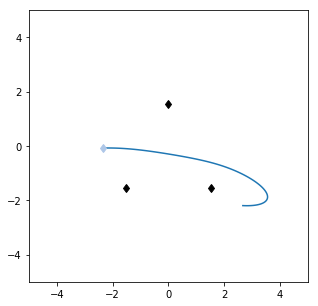

Predictions are [-0.11282225  0.11890989  0.05744691]
Charges are [-0.25634466 -0.17093244 -0.19580885]
Actual charges are are tensor([[-0.2563, -0.1709, -0.1958]], device='cuda:0')
26


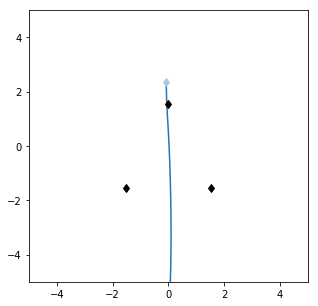

Predictions are [-0.08554205  0.03812957  0.03173334]
Charges are [-0.26474083 -0.2182094  -0.07958777]
Actual charges are are tensor([[-0.2647, -0.2182, -0.0796]], device='cuda:0')


In [19]:
badpredics = []
goodpredics = []
list_actual = []
list_predictions =[]
for index, predic in enumerate(predictions):
    distance = abs(actual[index] - predictions[index])
    list_actual.extend(actual[index].cpu().numpy().tolist()[0])
    list_predictions.extend(predictions[index].cpu().numpy().tolist()[0])
    if distance[0][0] > 0.65 and distance[0][1] > 0.65 and distance[0][2] > 0.65:
        badpredics.append(index)
    if distance[0][0] < 0.3 and distance[0][1] < 0.3 and distance[0][2] < 0.3:
        goodpredics.append(index)
for i in goodpredics:
    print(i)
    plot_sim(simulation_test[i])
    print(f'Predictions are {predictions[i][0].cpu().numpy()}')
    print(f'Charges are {charges_test[i]}')
    print(f'Actual charges are are {actual[i]}')

## Example charges (and their trajectories) with bad predictions

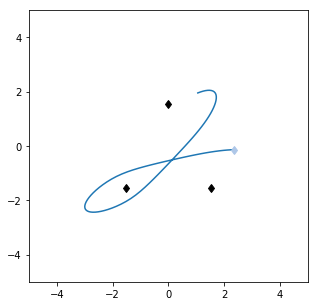

Predictions are [-0.10867161  0.1313682   0.11215792]
Charges are [-0.95846316 -0.67919017 -0.75830526]


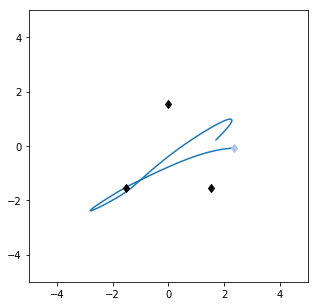

Predictions are [-0.11029806  0.12711911  0.08891263]
Charges are [-0.9430645  -0.94473405 -0.5994704 ]


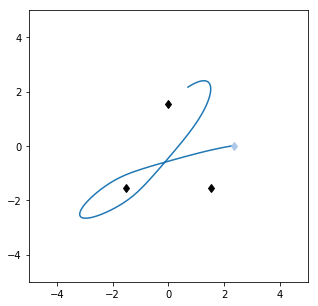

Predictions are [-0.10739996  0.12869383  0.11812828]
Charges are [-0.9143324  -0.54805132 -0.64857656]


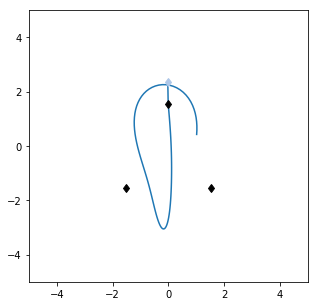

Predictions are [-0.10507201  0.11762684  0.09946989]
Charges are [-0.86127899 -0.65102751 -0.97197486]


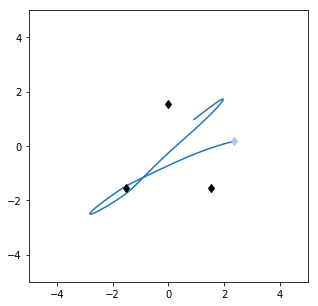

Predictions are [-0.10787123  0.12278049  0.10334718]
Charges are [-0.8903967  -0.84597156 -0.69113443]


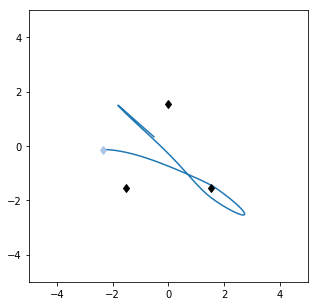

Predictions are [-0.09594738  0.09015004  0.11196811]
Charges are [-0.93654175 -0.99885095 -0.63137549]


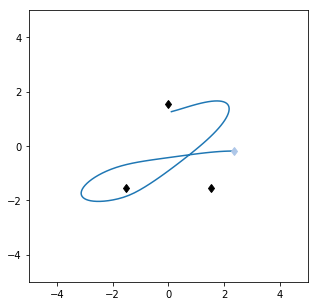

Predictions are [-0.10623807  0.11483421  0.11198067]
Charges are [-0.9124747  -0.6231933  -0.86799621]


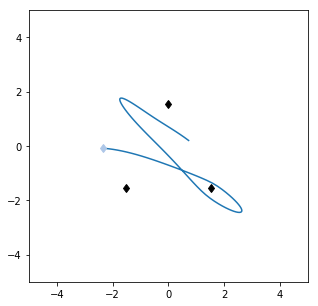

Predictions are [-0.10086168  0.10803518  0.10076294]
Charges are [-0.91167294 -0.90831124 -0.75699005]


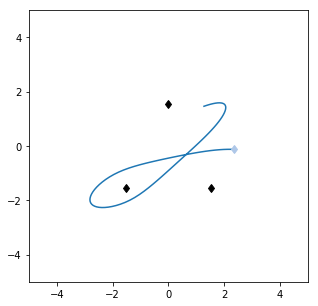

Predictions are [-0.10951041  0.13081625  0.10466016]
Charges are [-0.89417391 -0.78428705 -0.82146292]


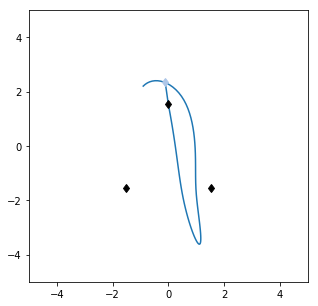

Predictions are [-0.10133222  0.10692485  0.13275628]
Charges are [-0.78591517 -0.91222337 -0.74412396]


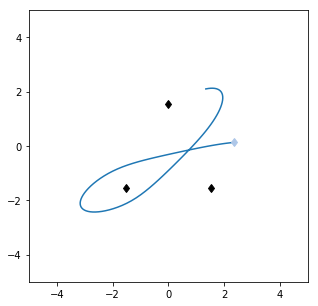

Predictions are [-0.10980729  0.13565877  0.11098827]
Charges are [-0.80340492 -0.54128554 -0.68181739]


In [21]:
for i in badpredics:
    plot_sim(simulation_test[i])
    print(f'Predictions are {predictions[i][0].cpu().numpy()}')
    print(f'Charges are {charges_test[i]}')

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("The mean squared error of our predictions is:", mean_squared_error(list_actual, list_predictions))

The mean squared error of our predictions is: 0.3890975436269039


# Task 3.2

## Data Handling and Preprocessing

We create a `collate_batch` method which produces batches of source and target sentences. This method will be used in the 'DataLoader' which enables us to iterate over the dataset in batches. In each iteration, a batch of input and output simulations would be returned. We pad all the sequences to the length of the longest simulation in the batch then we pack the padded simulation for better performance. 

In [26]:
def collate_batch_32(batch):
    '''
    Args:
        batch: batch sizes list of tuples (features, target)
    
    Returns:
        packed input simulation and corresponding targets
    
    '''
    data = [torch.from_numpy(item[0]).float() for item in batch]
    data_lengths = [d.size(0) for d in data]

    padded_data = pad_sequence(data, batch_first=True, padding_value=0)
    # packed_data = pack_padded_sequence(padded_data, data_lengths, batch_first=True, enforce_sorted=False)

    # targets = np.array([item[1] for item in batch],dtype=object)
    targets = [torch.from_numpy(item[1]).float() for item in batch]
    target_lengths = [t.size(0) for t in targets]
    padded_target = pad_sequence(targets, padding_value= 0)
    # packed_target = pack_padded_sequence(padded_target, target_lengths, batch_first=True, enforce_sorted=False)

    return padded_data.to(device), padded_target.to(device) 

    # return packed_data.to(device), packed_target.to(device) 

In [29]:
batch_len = 10
train_loader_32 = DataLoader(tuple(zip(simulation_train_task32, simulation_continued_train[:])), batch_size = batch_len, 
                        collate_fn = collate_batch_32)
val_loader_32 = DataLoader(tuple(zip(simulation_valid, simulation_continued_valid[:])), batch_size = batch_len, 
                        collate_fn = collate_batch_32)
test_loader_32 = DataLoader(tuple(zip(simulation_test, simulation_continued_test[:])), batch_size = 1, 
                        collate_fn = collate_batch_32)

## Model Implementation

In the implementation we define three objects: the encoder, the decoder and a full translation model that encapsulates the encoder and decoder.

In [30]:
class Encoder(nn.Module):
    def __init__(self, inp_size=2, hidden_size=110, n_layers=2, batch_size= batch_len, dropout=0.5):
        super(Encoder, self).__init__()

        self.inp_size = inp_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.batch_size = batch_size

        self.rnn = nn.LSTM(
            input_size = self.inp_size,
            hidden_size = self.hidden_size,
            num_layers = self.n_layers,
            dropout = dropout,
            batch_first = True
        )

    def forward(self, X):
        """
        Forward pass of encoder model. It aims at
        transforming the input sentence to a dense vector 
        
        Input:
        src shape:  [max_seq_len_in_batch, batch_size]

        Output:
        hidden and cell dense vectors (hidden and cell)
        which contains all sentence information, shape [n layers, batch size, hid dim]
        """

        _, (hidden, cell) = self.rnn(X)
        
        return hidden, cell

In [31]:
class Decoder(nn.Module):
    def __init__(self, input_size =2, hid_dim=110, n_layers=2, dropout=0.5):
        super().__init__()
        
        
        self.input_size = input_size
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
        self.rnn = nn.LSTM(input_size, hid_dim, n_layers, dropout = dropout)
        
        self.fc_out = nn.Linear(hid_dim, input_size)
        
        self.dropout = nn.Dropout(dropout)
    
        
    def forward(self, input, encoder_hidden, encoder_cell):
        """
        Forward pass of the decoder model. It aims at transforming
        the dense representation of the encoder into a sentence in
        the target language
        
        Input:
        hidden shape: [n layers, batch size, hid dim]
        cell shape: [n layers, batch size, hid dim]
        input shape: [batch size]  # 1 token for each sentence in the batch
        
        Output:
        prediction shape: [batch size, num_words_target_vocabulary]
        hidden shape: [n layers, batch size, hid dim]
        cell shape: [n layers, batch size, hid dim]
        """
        
       
        lstm_out, (self.hidden, self.cell) = self.rnn(input.unsqueeze(0), (encoder_hidden, encoder_cell))
          
        output = self.fc_out(lstm_out.squeeze(0))  # squeeze our 'sequence length 1' away
        
        return output, self.hidden, self.cell

In [32]:
import torch.optim as optim
import random

class lstm_seq2seq(nn.Module):
    '''Train LSTM encoder-decoder and make predictions '''
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

        self.optimizer = optim.Adam(self.parameters())

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        # calculate number of batch iterations
        trg_len = trg.shape[0]
        outputs = torch.zeros(trg_len, batch_len,2).to(device)

        hidden,cell = self.encoder(src)

        decoder_input = hidden[:,:,-1].T

        for t in range(1, trg_len):

            decoder_output, hidden, cell = self.decoder(decoder_input, hidden, cell)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio 
            decoder_input = trg[t,:,:] if teacher_force else decoder_output

        return outputs        

In [33]:
def rmse_loss(input, target, ignored_index, reduction='mean'):
    mask = target == ignored_index
    out = (input[~mask]-target[~mask])**2
    if reduction == "mean":
        return torch.sqrt(out.mean())
    elif reduction == "None":
        return out

## Model Training

In [34]:
enc = encoder = Encoder(n_layers=2)
dec = Decoder()

seq2seq = lstm_seq2seq(enc, dec, device).to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)
        
seq2seq.apply(init_weights)

lstm_seq2seq(
  (encoder): Encoder(
    (rnn): LSTM(2, 110, num_layers=2, batch_first=True, dropout=0.5)
  )
  (decoder): Decoder(
    (rnn): LSTM(2, 110, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=110, out_features=2, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [35]:
from tqdm import tqdm
def train(CLIP =1):
    train_losses = []
    valid_losses = []
    clip = CLIP
    num_epochs = 20
    for epoch in range(num_epochs):
        seq2seq.train()
        epoch_loss = 0
        for src, trg in tqdm(train_loader_32):
            seq2seq.optimizer.zero_grad()
            output = seq2seq(src, trg)
            loss = rmse_loss(output, trg, ignored_index=0)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(seq2seq.parameters(), clip)
            seq2seq.optimizer.step()
            epoch_loss += loss.item()
            torch.cuda.empty_cache()
        avg_train_loss = epoch_loss / len(train_loader_32)
        train_losses.append(avg_train_loss)
        print("train loss: ", epoch_loss/len(train_loader_32))
        

        with torch.no_grad():
            seq2seq.eval()
            eval_epoch_loss = 0
            for src, trg in val_loader_32:

                output = seq2seq(src, trg) 
                loss = rmse_loss(output, trg, ignored_index=0)
                
                eval_epoch_loss += loss.item()
                
                torch.cuda.empty_cache()

        avg_val_loss = eval_epoch_loss/len(val_loader_32)
        valid_losses.append(avg_val_loss)
        
        print("validation loss : ", eval_epoch_loss/len(val_loader_32))
    return valid_losses, train_losses

## Evaluation

In [36]:
val_losses, train_losses = train()

100%|██████████| 15/15 [00:01<00:00, 10.02it/s]


train loss:  1.6870505571365357
validation loss :  1.65708270072937


100%|██████████| 15/15 [00:01<00:00,  9.40it/s]


train loss:  1.3264824946721394
validation loss :  1.2483863830566406


100%|██████████| 15/15 [00:01<00:00,  9.71it/s]


train loss:  1.0866430163383485
validation loss :  1.041383045911789


100%|██████████| 15/15 [00:01<00:00,  9.47it/s]


train loss:  0.9348214268684387
validation loss :  0.868032842874527


100%|██████████| 15/15 [00:01<00:00,  9.58it/s]


train loss:  0.7700624585151672
validation loss :  0.8109021365642548


100%|██████████| 15/15 [00:01<00:00,  9.50it/s]


train loss:  0.7173888365427653
validation loss :  0.687442398071289


100%|██████████| 15/15 [00:01<00:00,  9.80it/s]


train loss:  0.6136618971824646
validation loss :  0.674036169052124


100%|██████████| 15/15 [00:01<00:00,  9.63it/s]


train loss:  0.6022177616755168
validation loss :  0.6560693591833114


100%|██████████| 15/15 [00:01<00:00,  9.83it/s]


train loss:  0.5652694205443064
validation loss :  0.5995993316173553


100%|██████████| 15/15 [00:01<00:00,  8.74it/s]


train loss:  0.5471936662991842
validation loss :  0.624618399143219


100%|██████████| 15/15 [00:01<00:00,  9.70it/s]


train loss:  0.559406449397405
validation loss :  0.5935863465070724


100%|██████████| 15/15 [00:01<00:00,  9.67it/s]


train loss:  0.5698997616767884
validation loss :  0.5829406946897506


100%|██████████| 15/15 [00:01<00:00,  9.64it/s]


train loss:  0.4955971280733744
validation loss :  0.5750139802694321


100%|██████████| 15/15 [00:01<00:00,  8.96it/s]


train loss:  0.49831801652908325
validation loss :  0.5786515802145005


100%|██████████| 15/15 [00:01<00:00, 10.01it/s]


train loss:  0.5067413032054902
validation loss :  0.5437107264995575


100%|██████████| 15/15 [00:01<00:00,  9.71it/s]


train loss:  0.4971323231856028
validation loss :  0.534691435098648


100%|██████████| 15/15 [00:01<00:00, 10.60it/s]


train loss:  0.4882685383160909
validation loss :  0.5436536818742752


100%|██████████| 15/15 [00:01<00:00, 10.46it/s]


train loss:  0.535971999168396
validation loss :  0.5205869615077973


100%|██████████| 15/15 [00:01<00:00, 10.33it/s]


train loss:  0.5264657894770305
validation loss :  0.5411837607622146


100%|██████████| 15/15 [00:01<00:00, 10.53it/s]


train loss:  0.47230268716812135
validation loss :  0.5383846193552018


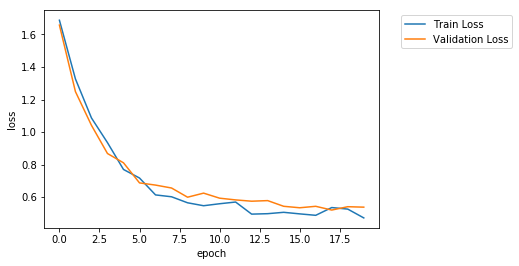

In [37]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label="Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [38]:
def test(model = seq2seq):
    outputs_list = []
    with torch.no_grad():
        for index, (src, trg) in enumerate(test_loader_32):
            outputs = model(src, trg)
            outputs_list.append(outputs[:,0,:].cpu().numpy())
        return outputs_list
output_list = test()

In [155]:
def plot_triple(x, x_gt=None, y=None, y_gt=None, z=None, z_gt=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    # ax2.axes = plt.gca()
    ax2.set_xlim([-5., 5.])
    ax2.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    ax2.plot(x[:, 0], x[:, 1], color=cmap(0))
    ax2.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(10, 5)
    for charge in charge_locations:
        ax2.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
       ax2.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)

    ax3.set_xlim([-5., 5.])
    ax3.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    ax3.plot(z[:, 0], z[:, 1], color=cmap(0))
    ax3.plot(z[0, 0], z[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(10, 5)
    for charge in charge_locations:
        ax3.plot(charge[0], charge[1], 'd', color='black')
    if z_gt is not None:
       ax3.plot(z_gt[:, 0], z_gt[:, 1], color='red', linewidth=.5)

    ax1.set_xlim([-5., 5.])
    ax1.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    ax1.plot(y[:, 0], y[:, 1], color=cmap(0))
    ax1.plot(y[0, 0], y[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(10, 5)
    for charge in charge_locations:
        ax1.plot(charge[0], charge[1], 'd', color='black')
    if y_gt is not None:
       ax1.plot(y_gt[:, 0], y_gt[:, 1], color='red', linewidth=.5)

Our prediction of the trajectory on the left, the correct continued trajectory in the middle and the baseline to the right


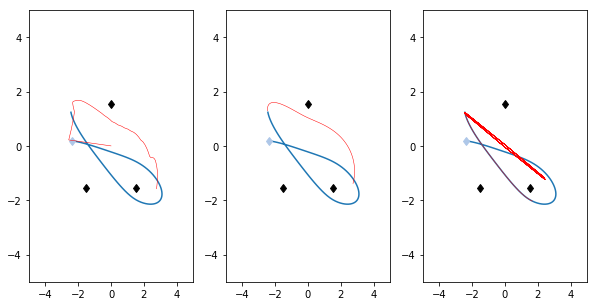

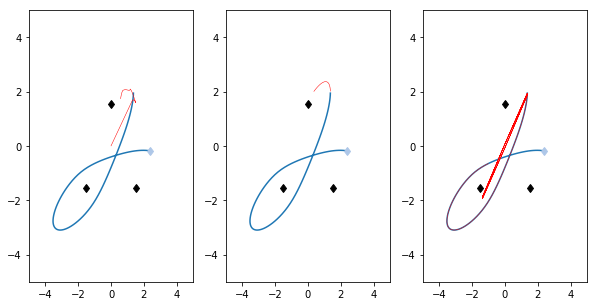

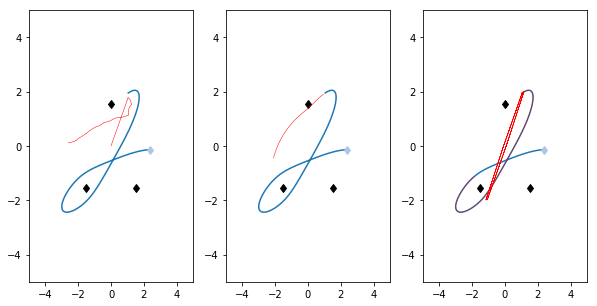

In [156]:
print("Our prediction of the trajectory on the left, the correct continued trajectory in the middle and the baseline to the right")

for sim in range(3):
    sim_test = simulation_test[sim]
    length = simulation_continued_test[sim].shape[0]
    for ix in range(simulation_continued_test[sim].shape[0]): # get an equal baseline prediction to the continued simulation
        baselinepredic = sim_test[-1] - sim_test[-2]
        baselinepredic = baselinepredic.reshape(1,2)
        sim_test = np.concatenate((sim_test, baselinepredic), axis=0)
    plot_triple(simulation_test[sim], simulation_continued_test[sim], simulation_test[sim], output_list[sim], simulation_test[sim], sim_test[length:])